Christiaan van Roon - 11122854  
Sander Hansen - 10995080

# Convolutions

In [1]:
#Pylab inline is not a good habit to use
import numpy
import matplotlib

from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

### A1
*Consider the one dimensional sampled function* $F$:
    $$\pmatrix{1& 2& 1& 3& 2& 3& 1& 2& 3& 8& 7& 8& 9& 9& 7& 8}$$

*Calculate $F\star W_1$ with:
    $$W_1 = \pmatrix{1&\underline{1}&1}$$
   where the underline element denotes the origin (i.e. W[0]).*

In [2]:
F = [0, 0, 0, 1, 2, 1, 3, 2, 3, 1, 2, 3, 8, 7, 8, 9, 9, 7, 8, 0, 0, 0]
W_1 = [1, 1, 1]

print(np.convolve(F, W_1)[3:21])


[ 1  3  4  6  6  8  6  6  6 13 18 23 24 26 25 24 15  8]


We extended the sampled function with three zero's on both sides to prevent the border problem and get the correct results.

### B1
*The Sobel filter (in x-direction) is a filter that convolves an image with the kernel*

$$	 \pmatrix{
	   1&0&-1\\
	   2&0&-2\\
	   1&0&-1}$$

*This convolution is separable. What two kernels are being used
in the separation?*

The two kernels that are used in this separation:

 $$	 \pmatrix{
	   1&0&-1\\
	   2&0&-2\\
	   1&0&-1} = 
   \pmatrix{1&0&-1} \ast 
   \pmatrix{1\\2\\1}$$

 ### B2
  *To compare the speed of a separable filter or a true 2D filter
  you have to compare the time it takes to run a filter:
  ``uniform_filter(f,s)`` versus
  ``convolve(f,ones((s,s))/(s**2))``. These two filters should
  give the same result but their timings are different. Run both
  filters on the same image for several values of s. Plot the
  graph of the run time versus the size of the filter. Compare the
  results, are they in accordance with what you expected?

  *To time a piece of Python code you can use the ``time`` function
  (from the ``time`` package, so insert a ``from time import
  time`` line at the start of your code):*

      startTime = time() # returns the actual time in seconds # here code to be timed
      elapsedTimeInSeconds = time()-startTime

  *Be aware that in case filters get very fast (say in the order of
  milliseconds) the accuracy when you time the execution of the
  filter once is very low, therefore in such cases you better time
  the execution time of the same filter repeated several times).*

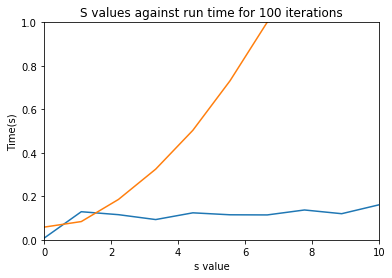

In [3]:
from time import time
import scipy.ndimage
F = np.random.randint(1,10,(256, 256))

# Run the give filter(func) n times and return the time it took to execute
def time_filter(n, F, s, func):
    startTime = time()
    for _ in range(0, n):
        func(F, s)
    elapsedTimeInSeconds = time() - startTime
    return elapsedTimeInSeconds

#Test the uniform filter and the convolve funciton
y1 = []
y2 = []
for s in range(1, 11):
    y1.append(time_filter(100, F, s, scipy.ndimage.filters.uniform_filter))
    y2.append(time_filter(100, F, ones((s,s)) / (s**2), scipy.ndimage.filters.convolve))


#Plot the execution time of both functions against values of s
x = linspace(0, 10, 10)
plt.plot(x, y1)
plt.plot(x, y2)
plt.axis([0, 10, 0, 1])
plt.xlabel('s value')
plt.ylabel('Time(s)')
plt.title('S values against run time for 100 iterations')
plt.show()

### C1

*In these exercises the image I is the supposed to be the 15x15 image with all zeros except at the center where the value is 1.*

In [4]:
I = np.zeros((15, 15))
I[7, 7]=1

*1. The following functions from scipy.ndimage are all convolutions. Calculate the impulse responses for:*

    * laplace
    * sobel
    * prewitt
    * gaussian_laplace

  *Some of these functions have parameters that result in different kernels being used.
  Also run the filters on the cameraman image (or any other image of your liking). Comment on what you expect (or have read) the filter is supposed to do.*

* Laplace:  
    Laplace is a filter used to detect edges in an image. Laplace filtering can be used in two ways: using a mask where the center value of the mask is negative and thus detects outward edges or a mask where the center value is positive and thus detects inward edges.
 The result of applying this filter to the image I is:
 

In [5]:
print('Laplace filter applied')
print(scipy.ndimage.filters.laplace(I))

Laplace filter applied
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -4.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


* Sobel: Also used for edge detection image, it is capable of detecting horizontal and vertical edges and is a lot similar to the prewitt filter. You expect the mask to have one column of negative values and one column of positive values for the detection of vertical edges.
    

In [6]:
print('Sobel filter applied')
print(scipy.ndimage.filters.sobel(I))

Sobel filter applied
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0. -2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


* Prewitt: Used to detect the same edges as the sobel filter. To detect edges the differences in pixel intensity is used. To detect vertical edges a mask is used where the left column is negative and the right column positive and for horizontal edges the top row should be negative and the bottom row positive.

In [7]:
print('Prewitt filter applied')
print(scipy.ndimage.filters.prewitt(I))

Prewitt filter applied
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


* Gaussian_laplace: This filter first smoothens the picture before detecting edges using laplace. This is effective because the laplace filter makes use of the second derivative and thus is very sensitive for noise. 

In [8]:
print('Gaussian_laplace filter applied')
print(scipy.ndimage.filters.gaussian_laplace(I, 0))

Gaussian_laplace filter applied
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


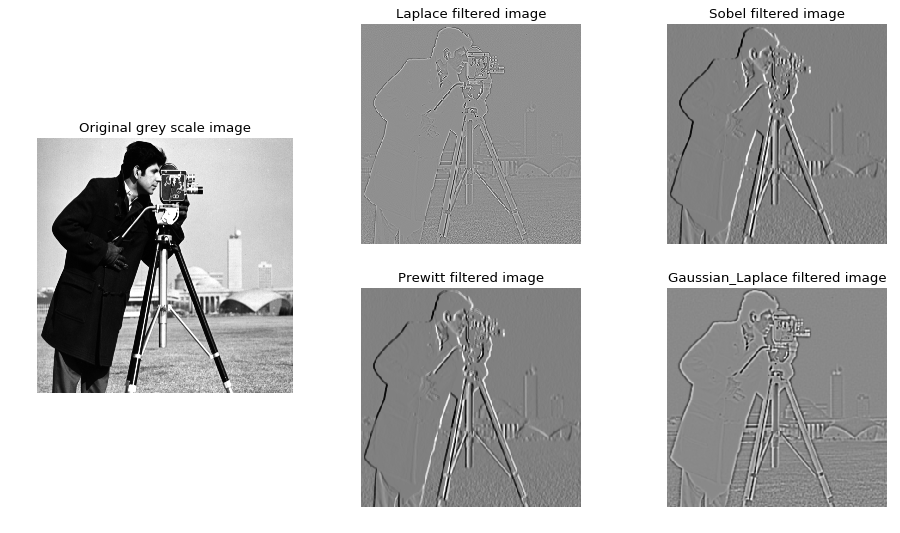

In [9]:
img = imread('images/cameraman.png')

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w')


plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original grey scale image')

plt.subplot(2,3,2)
plt.axis('off')
plt.imshow(scipy.ndimage.filters.laplace(img), cmap=plt.cm.gray)
plt.title('Laplace filtered image')

plt.subplot(2,3,3)
plt.axis('off')
plt.imshow(scipy.ndimage.filters.sobel(img), cmap=plt.cm.gray)
plt.title('Sobel filtered image')

plt.subplot(2,3,5)
plt.axis('off')
plt.imshow(scipy.ndimage.filters.prewitt(img), cmap=plt.cm.gray)
plt.title('Prewitt filtered image')

plt.subplot(2,3,6)
plt.axis('off')
plt.imshow(scipy.ndimage.filters.gaussian_laplace(img, sigma=1), cmap=plt.cm.gray)
plt.title('Gaussian_Laplace filtered image')

plt.show()

### C2
*Another filter in the scipy.ndimage package is the maximum
      filter. The result of ``maximum_filter(I,(5,5))`` and
      ``convolve(I,ones((5,5)))`` are the same. Can we conclude
      that they are the same filter? Give an argumentation for your
      answer.*


# Local Structure I

## Analytical Local Structure

*Consider the following function:*
$$f(x,y) = A \sin(Vx) + B \cos(W y)$$

1 *Calculate analytically the following derivatives of this function: $f_{x}$, $f_y$, $f_{xx}$, $f_{xy}$ and $f_{yy}$ and give the results in your report. Note that $f_{x}$ denotes the first order partial derivative in xx, etc.*

$$
f_{x} = AV * \cos(Vx)
$$

$$
f_{y} = BW * -\sin(Wy)
$$

$$
f_{xx} = AV^2 * -\sin(Vx)
$$

$$
f_{xy} = 0
$$

$$
f_{yy} = BW^2 * -\cos(Wy)
$$

$$
f_{yx} = 0
$$
2 *A discrete version of the function $f$ can be made and visualized in Python with the code:*

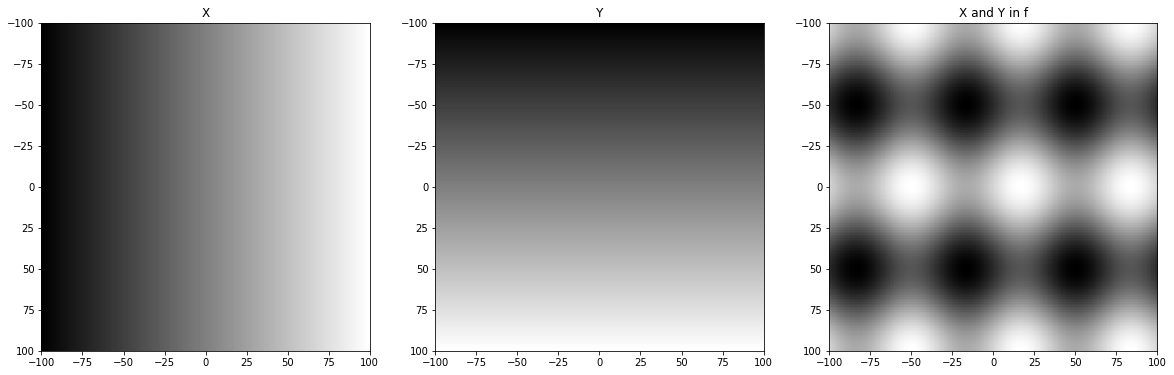

In [10]:
x = np.arange(-100,101); y = np.arange(-100,101)
X, Y = np.meshgrid(x,y)
A = 1; B = 2; V = 6*np.pi/201; W = 4*np.pi/201
F = A*np.sin(V*X) + B*np.cos(W*Y)

plt.figure(figsize=(20,10))
plt.clf()
plt.subplot(1,3,1)
plt.imshow(X, cmap=plt.cm.gray, extent=(-100,100,100,-100))
plt.title("X")
plt.subplot(1,3,2)
plt.imshow(Y, cmap=plt.cm.gray, extent=(-100,100,100,-100))
plt.title("Y")
plt.subplot(1,3,3)
plt.imshow(F, cmap=plt.cm.gray, extent=(-100,100,100,-100))
plt.title("X and Y in f")
plt.show()

3 *Generate the image Fx and Fy, where Fx is the sampled version of the derivative image $f_x$ that you have calculate analytically before. I.e. sample the function $f_x$ to get Fx in the same way as in the above piece of code the function $f$ is sampled to get F. Plot both images in your report.*

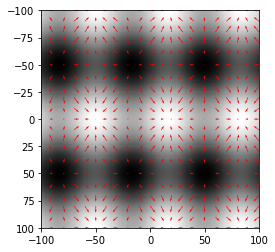

In [11]:
Fx = A * V * np.cos(V * X)
Fy = B * W * -np.sin(W * Y)

xx = np.arange(-100, 101, 10);
yy = np.arange(-100, 101, 10);

XX, YY = np.meshgrid(xx, yy);

FFx = Fx[::10, ::10]
FFy = Fy[::10, ::10]
plt.clf();
plt.imshow(F, cmap=plt.cm.gray, extent=(-100,100,100,-100), origin='upper');
plt.quiver( xx, yy, FFx, FFy, color='red', angles='xy' );
plt.show()

## Gaussian Convolution

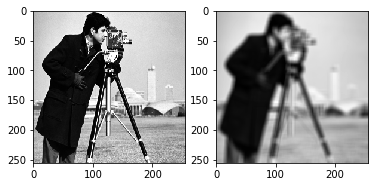

In [12]:
from scipy.ndimage import convolve

F = plt.imread('images/cameraman.png')
W = np.ones((9,9))/81
G = convolve(F,W,mode='nearest')

plt.subplot(1,2,1)
plt.imshow(F,cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(G,cmap=plt.cm.gray)
plt.show()

1 *Write a function Gauss(s) that returns a 2D sampled Gaussian function with scale s in a numpy array. You should make sure that an appropriate choice is made for the size of the sampling grid. That choice depends on the scale. Furthermore you should make sure that the sum of all kernel values is equal to one. The origin should be in the middle of the array.*

This is done with the help of the following formula;

$$G^s(x,y) = \frac{1}{2\pi s^2}\exp\left(-\frac{x^2+y^2}{2s^2}\right)$$

This is called the Gaussian weight function. This will determine the Gaussian function based on scale s.

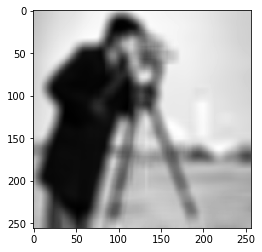

In [13]:
def Gauss(s):
    W = np.zeros((2 * s + 1,2 * s + 1))
    for i, x in enumerate(range(-s, s + 1)):
        for j, y in enumerate(range(-s, s + 1)):
            W[i, j] = (1/(2 * np.pi * s**2)) * np.exp(-(x**2 + y**2)/(2*s**2))
    
    W = W / np.sum(W)
    return W

s = 8
G2 = convolve(F, Gauss(s), mode="nearest")

plt.imshow(G2,cmap=plt.cm.gray)
plt.show()
    

2 *In your report you should present a plot of the kernel. In case you have a modern version of matplotlib you might have 3D plotting capabilities (look in the documentation on the web). Else display the array of kernel values for a small value of s (say s=1).*

As we can see below we will get the Gaussian bell curve (seen from above).

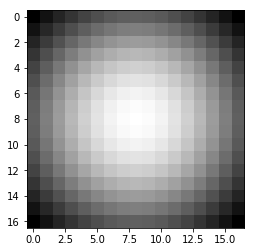

In [14]:
plt.imshow(Gauss(s),cmap=plt.cm.gray)
plt.show()

3 *Given the Gaussian kernel you should be able to do the Gaussian convolution using convolve(F,Gauss(s),mode='nearest'). Time the runtime of this function for several values of s (say s=1,2,3,5,7,9,11,15,19) and plot the time versus the scale. Show the plot in your report. What is the order of computational complexity in terms of the scale?*

As we can see in the graph below the complexity is $O(n^2)$

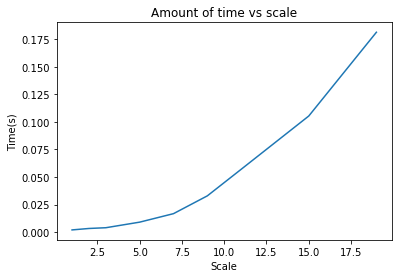

In [15]:
from timeit import Timer

time = np.zeros(9)
tests = 10

time[0] = Timer(lambda: convolve(F, Gauss(1), mode="nearest")).timeit(number=tests)
time[1] = Timer(lambda: convolve(F, Gauss(2), mode="nearest")).timeit(number=tests)
time[2] = Timer(lambda: convolve(F, Gauss(3), mode="nearest")).timeit(number=tests)
time[3] = Timer(lambda: convolve(F, Gauss(5), mode="nearest")).timeit(number=tests)
time[4] = Timer(lambda: convolve(F, Gauss(7), mode="nearest")).timeit(number=tests)
time[5] = Timer(lambda: convolve(F, Gauss(9), mode="nearest")).timeit(number=tests)
time[6] = Timer(lambda: convolve(F, Gauss(11), mode="nearest")).timeit(number=tests)
time[7] = Timer(lambda: convolve(F, Gauss(15), mode="nearest")).timeit(number=tests)
time[8] = Timer(lambda: convolve(F, Gauss(19), mode="nearest")).timeit(number=tests)

plt.plot([1, 2, 3, 5, 7, 9, 11, 15, 19], (time / tests))
plt.xlabel('Scale')
plt.ylabel('Time(s)')
plt.title('Amount of time vs scale')
plt.show()

## Separable Gaussian Convolution

*The Gaussian function $G^s(x,y)$ is the unique rotationally symmetric function that can be separated by dimension, i.e. we can write:*

$$G^s(x,y) = G^s_1(x) G^s_1(y)$$

*where $G^s_1$ is the one dimensional Gaussian function. The convolution with a separable kernel is easy: first we convolve along the rows followed by a convolution along the columns.*

*1 Write the Gauss1 function.*

To implement this we need the Gaussian function with one variable. Which will be (for x);

$$G^s(x) = \frac{1}{s\sqrt{2 \pi}} \exp\left( -\frac{x^2}{2 s^2}\right)$$

In [16]:
def Gauss1(s):
    W = np.zeros((2 * s + 1))
    for i, x in enumerate(range(-s, s + 1)):
        W[i] = (1/(s*np.sqrt(2*np.pi)))*np.exp(-(x**2)/(2*s**2))
    
    W = W / np.sum(W)
    return W

*2 Calculate the Gaussian convolution using the separability property and time the 2D Gaussian convolution as a function of the scale s. What is the order of computational complexity now?*

As we can see in the graph below the complexity is now O(n)

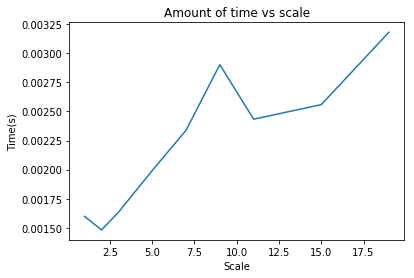

In [17]:
from scipy.ndimage import convolve1d

time = np.zeros(9)
tests = 30

time[0] = Timer(lambda: convolve1d(F, Gauss1(1), axis=0,mode='nearest')).timeit(number=tests)
time[0] += Timer(lambda: convolve1d(F, Gauss1(1), axis=1,mode='nearest')).timeit(number=tests)
time[1] = Timer(lambda: convolve1d(F, Gauss1(2), axis=0,mode='nearest')).timeit(number=tests)
time[1] += Timer(lambda: convolve1d(F, Gauss1(2), axis=1,mode='nearest')).timeit(number=tests)
time[2] = Timer(lambda: convolve1d(F, Gauss1(3), axis=0,mode='nearest')).timeit(number=tests)
time[2] += Timer(lambda: convolve1d(F, Gauss1(3), axis=1,mode='nearest')).timeit(number=tests)
time[3] = Timer(lambda: convolve1d(F, Gauss1(5), axis=0,mode='nearest')).timeit(number=tests)
time[3] += Timer(lambda: convolve1d(F, Gauss1(5), axis=1,mode='nearest')).timeit(number=tests)
time[4] = Timer(lambda: convolve1d(F, Gauss1(7), axis=0,mode='nearest')).timeit(number=tests)
time[4] += Timer(lambda: convolve1d(F, Gauss1(7), axis=1,mode='nearest')).timeit(number=tests)
time[5] = Timer(lambda: convolve1d(F, Gauss1(9), axis=0,mode='nearest')).timeit(number=tests)
time[5] += Timer(lambda: convolve1d(F, Gauss1(9), axis=1,mode='nearest')).timeit(number=tests)
time[6] = Timer(lambda: convolve1d(F, Gauss1(11), axis=0,mode='nearest')).timeit(number=tests)
time[6] += Timer(lambda: convolve1d(F, Gauss1(11), axis=1,mode='nearest')).timeit(number=tests)
time[7] = Timer(lambda: convolve1d(F, Gauss1(15), axis=0,mode='nearest')).timeit(number=tests)
time[7] += Timer(lambda: convolve1d(F, Gauss1(15), axis=1,mode='nearest')).timeit(number=tests)
time[8] = Timer(lambda: convolve1d(F, Gauss1(19), axis=0,mode='nearest')).timeit(number=tests)
time[8] += Timer(lambda: convolve1d(F, Gauss1(19), axis=1,mode='nearest')).timeit(number=tests)

plt.plot([1, 2, 3, 5, 7, 9, 11, 15, 19], (time / tests))
plt.xlabel('Scale')
plt.ylabel('Time(s)')
plt.title('Amount of time vs scale')
plt.show()


## Gaussian Derivatives

The Gaussian derivatives of an image (function) are calculated by
convolving the image with the derivative of a Gaussian function.

1 Show *analytically* (that is using math) that all derivatives of
      the 2D Gaussian function are separable functions as well.


To Proof that all derivatives of the 2D Gaussian function are seperable we multiply the 1D Gaussian functions from both directions:
$$G^s(x,y) = G^s(x)G^s(y)$$
$$G^s(x,y) = \frac{1}{s \sqrt{2\pi}}e^{-\frac{x^2}{2s^2}}\times\frac{1}{s\sqrt{2\pi}}e^{-\frac{y^2}{2s^2}} $$
$$G^s(x,y) = \frac{1}{s \sqrt{2 \pi} \times s \sqrt{2 \pi}} \times e^{-\frac{x^2}{2s^2} \times - \frac{y^2}{2s^2}}$$
$$G^s(x,y) = \frac{1}{2 \pi s^2} \times e^{-\frac{x^2 + y^2}{2s^2}}$$

*2 Write a function ``gD(F, s, iorder, jorder)`` that returns the
      Gaussian derivative convolution of image F. The order of
      differentation is ``iorder`` for the first direction (top to
      bottom!) and ``jorder`` for the second direction (left to
      right). Only differentation up to order 2 is needed.*

In [18]:
def gD(F, s, iorder, jorder):
    #Var, represents x and y variables
    var = np.arange(-(s * 3), (s * 3)+1)
    
    #Part of the equation that comesback in every derivative
    root = (1 / (s * sqrt(2 * pi)))
    
    #Original and first 2 derivatives
    original = root * exp(-(x**2 / (2 * s**2)))
    first_order = ((-var * exp(-var**2 / (2 * s**2)) / (s**2)) * root)
    second_order = ((((var**2) - (s**2)) * exp(-((var**2) / (2 * (s**2)))) / (s**4)) * root)
    
    #Generate new image
    for order in [iorder, jorder]:
        
        #Use correct axis
        idx = 0
        if order == [iorder, jorder][1]:
            idx = 1
        
        #Use correct derivative
        if order == 0:
            F = convolve1d(F, original, axis=idx)
        elif order == 1:
            F = convolve1d(F, first_order, axis=idx)
        else:
            F = convolve1d(F, second_order, axis=idx)

    return F

*3 Visualize the Gaussian derivative of the cameraman image up to
      order 2 in your report (i.e. the derivatives $f$ (zero order),
      $f_x$ and $f_y$ (first order) and $f_{xx}$, $f_{xy}$ and
      $f_{yy}$ (second order).
      Using the ``gD`` function you can calculate the discrete first
      order derivative in x direction with ``dFx = gD(F, s, 0, 1)``*



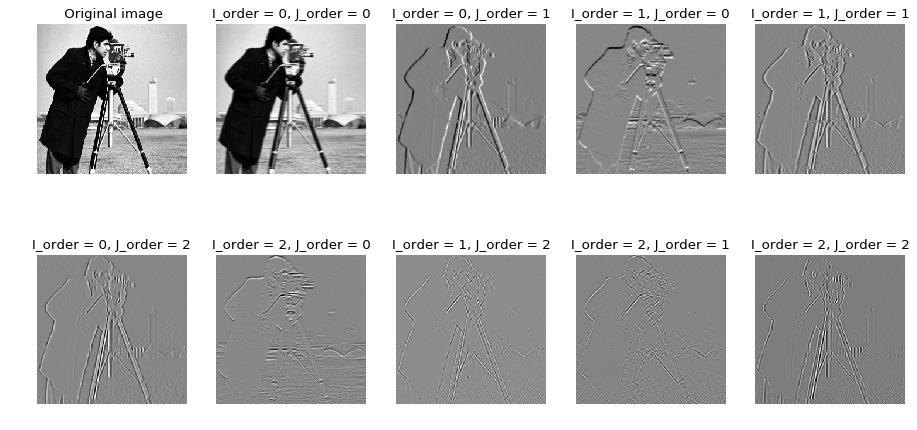

In [19]:
img = imread('images/cameraman.png')

plt.figure(num=None, figsize=(14, 7), dpi=80, facecolor='w')

plt.subplot(2,5,1)
plt.axis('off')
plt.title(' Original image')
plt.imshow(img, cmap=cm.gray)

plt.subplot(2,5,2)
plt.axis('off')
plt.title('I_order = 0, J_order = 0')
plt.imshow(gD(img, 1, 0, 0), cmap=cm.gray)

plt.subplot(2,5,3)
plt.axis('off')
plt.title('I_order = 0, J_order = 1')
plt.imshow(gD(img, 1, 0, 1), cmap=cm.gray)

plt.subplot(2,5,4)
plt.axis('off')
plt.title('I_order = 1, J_order = 0')
plt.imshow(gD(img, 1, 1, 0), cmap=cm.gray)

plt.subplot(2,5,5)
plt.axis('off')
plt.title('I_order = 1, J_order = 1')
plt.imshow(gD(img, 1, 1, 1), cmap=cm.gray)

plt.subplot(2,5,6)
plt.axis('off')
plt.title('I_order = 0, J_order = 2')
plt.imshow(gD(img, 1, 0, 2), cmap=cm.gray)

plt.subplot(2,5,7)
plt.axis('off')
plt.title('I_order = 2, J_order = 0')
plt.imshow(gD(img, 1, 2, 0), cmap=cm.gray)

plt.subplot(2,5,8)
plt.axis('off')
plt.title('I_order = 1, J_order = 2')
plt.imshow(gD(img, 1, 1, 2), cmap=cm.gray)

plt.subplot(2,5,9)
plt.axis('off')
plt.title('I_order = 2, J_order = 1')
plt.imshow(gD(img, 1, 2, 1), cmap=cm.gray)

plt.subplot(2,5,10)
plt.axis('off')
plt.title('I_order = 2, J_order = 2')
plt.imshow(gD(img, 1, 2, 2), cmap=cm.gray)
plt.show()

## Comparison of theory and practice

*At the start of this exercise you have calculated the derivatives of
the function*
   $$f(x,y) = A \sin(Vx) + B \cos(W y)$$

*analytically. You have also sampled this function (for given values of
parameters and sampling intervals) to visualize the function as an
image.*

*In this exercise you will have to calculate the derivatives using the
``gD`` function that you have written and compare the results with the
analytical derivatives.*

*In practice you are mixing derivative calculation with smoothing (the
Gaussian convolution). The effect of Gaussian smoothing on this
particular function is a multiplication of the sine and cosine
function with a factor that is dependent on the frequency. So when
comparing your practical derivative result and analytical result you
will see that the ratio is constant (well in allmost all of the image).*

1* Compare the analytical first order derivatives in $x$ and $y$ of*
      $f$ *with your discrete implementation, i.e. compare ``Fx`` with
      ``dFx = gD(F, 1, 0, 1)``.*


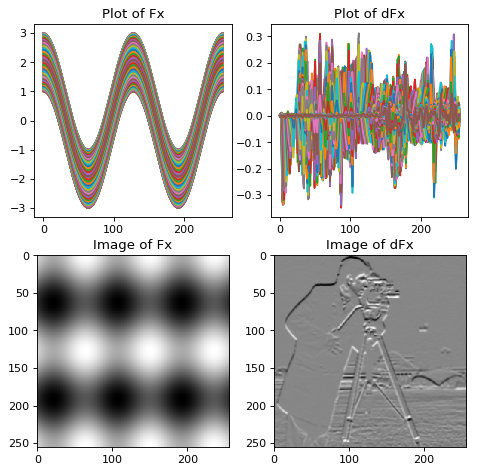

In [20]:
x = np.arange(-128,128); y = np.arange(-128,128)
X, Y = np.meshgrid(x,y)
A = 1; B = 2; V = 6*np.pi/256; W = 4*np.pi/256
Fx = A*np.sin(V*X) + B*np.cos(W*Y)

dFx = gD(F, 1, 1, 0)

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w')

plt.subplot(2,2,1)
plt.title("Plot of Fx")
plt.plot(Fx)

plt.subplot(2,2,2)
plt.title("Plot of dFx")
plt.plot(dFx)

plt.subplot(2,2,3)
plt.imshow(Fx, cmap = cm.gray)
plt.title("Image of Fx")

plt.subplot(2,2,4)
plt.imshow(dFx, cmap = cm.gray)
plt.title("Image of dFx")
plt.show()

2 *Calculate ``Fx/dFx`` (
watch out for points where dFx is zero)
      and convince yourself that it is nearly constant in every
      pixel. Where does it deviates from the constant value?*

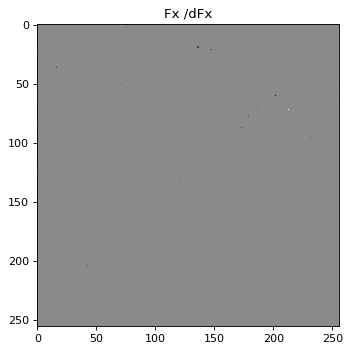

In [21]:
plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w')
plt.title('Fx /dFx')
plt.imshow(Fx / dFx, cmap= cm.gray)
plt.show()

3 *(extra points) Can you explain and calculate the value of the
      fraction? The easiest way is to use Fourier theory...*

## Canny Edge Detector

*Finding edges in images is often an important first step in image
   processing applications. Whereas in the past a lot of edge
   detectors have been suggested, nowadays most often the Canny edge
   detector is used.*

1 *Implement the Canny edge detector using the ``gD`` function that
      you have implemented in previous sections.*

   *The result of the function ``E = canny(F, s)`` should be an
      image ``E`` where the value in a pixel equals the gradient norm
      (in that pixel) in case it is an edge pixel and zero otherwise.*

   *To find the zero crossings in an image you can write a simple
      function that looks in each 3x3 neighborhood of a pixel whether
      there are both negative and positive values on opposite sides of
      the central pixel. This is not a perfect solution but it does
      the job quite well.*

In [22]:
def check_signs(x, y):
    """
    Check if x and y have opposite signs
    """
    if(x > 0 and y < 0):
        return True
    elif(x < 0 and y > 0):
        return True

    return False

def check_pixel(Fzz, x, y):
    """
    Check in a 3x3 space around the point x and y
    if all opposite neighbours have opposite signs
    """
    directions = [-1, 0, 1]
    for y_dir in directions:
        for x_dir in directions:
            if(check_signs(Fzz[y - y_dir][x - x_dir], Fzz[y + y_dir][x + x_dir])):
                return True
    return False


def canny(F, s):
    """
    Canny edge detection in image F
    """
    canny = np.zeros((256, 256))
    first_order_x = gD(F, s, 1, 0)
    first_order_y = gD(F, s, 0, 1)
    first_order_xy = gD(F, s, 1, 1)
    second_order_xx = gD(F, s, 2, 0)
    second_order_yy = gD(F, s, 0, 2)
    
    Full_first_order = sqrt(first_order_x**2 + first_order_y**2)
    Full_second_order = (first_order_x**2 * second_order_xx) +\
                        (2 * first_order_x * first_order_y * first_order_xy) +\
                        (first_order_y**2 * second_order_yy)
    img_width = shape(F)[0]
    img_height = shape(F)[1]
    
    for y in range(img_width - 2):
        for x in range(img_height - 2):
            if(check_pixel(Full_second_order, x, y)):
                canny[y][x] = 1
    return canny

2 *Test your canny function on the camereman image. Show the
      results in your report for several scales s used in the
      derivatives calculations.*

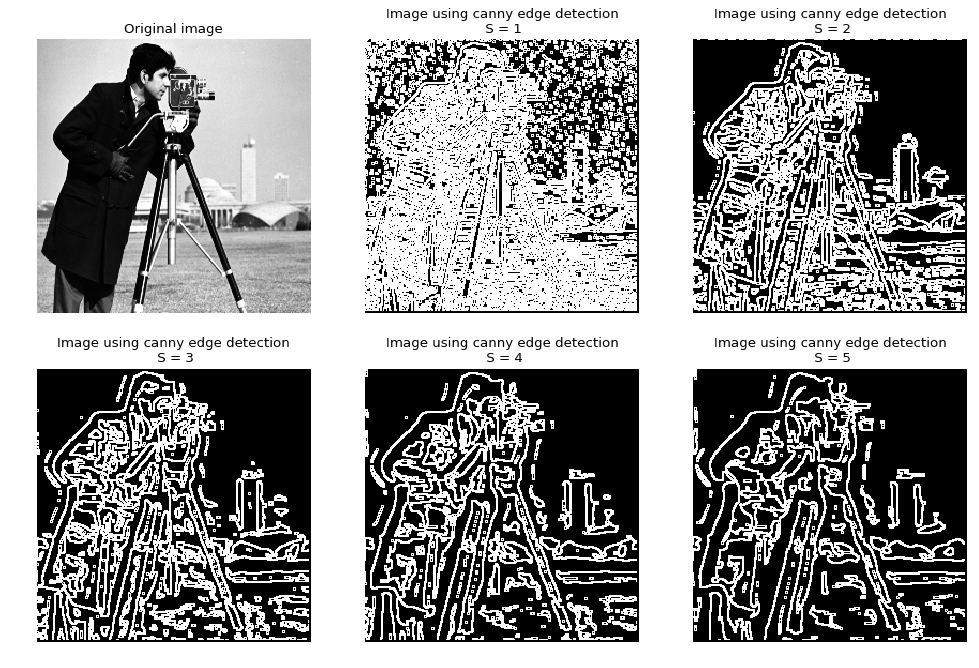

In [23]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w')
F = plt.imread('images/cameraman.png')
E1 = canny(F, 1)
E2 = canny(F, 2)
E3 = canny(F, 3)
E4 = canny(F, 4)
E5 = canny(F, 5)

plt.subplot(2,3,1)
plt.axis('off')
plt.title("Original image")
plt.imshow(F, cmap=plt.cm.gray)

plt.subplot(2,3,2)
plt.axis('off')
plt.title("Image using canny edge detection\n S = 1")
plt.imshow(E1, cmap=plt.cm.gray)

plt.subplot(2,3,3)
plt.axis('off')
plt.title("Image using canny edge detection\n S = 2")
plt.imshow(E2, cmap=plt.cm.gray)

plt.subplot(2,3,4)
plt.axis('off')
plt.title("Image using canny edge detection\n S = 3")
plt.imshow(E3, cmap=plt.cm.gray)

plt.subplot(2,3,5)
plt.axis('off')
plt.title("Image using canny edge detection\n S = 4")
plt.imshow(E4, cmap=plt.cm.gray)

plt.subplot(2,3,6)
plt.axis('off')
plt.title("Image using canny edge detection\n S = 5")
plt.imshow(E5, cmap=plt.cm.gray)

plt.show()